## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the full dataset
df = pd.read_csv('data/full_dataset.csv')

In [2]:
# Drop the first row from the dataframe (it's substantially lower than the rest because of the tail end of covid)
df = df.iloc[1:]
# Drop the last row from the dataframe (if it's not a complete week)
# df = df.iloc[:-1]

## Plot covariates

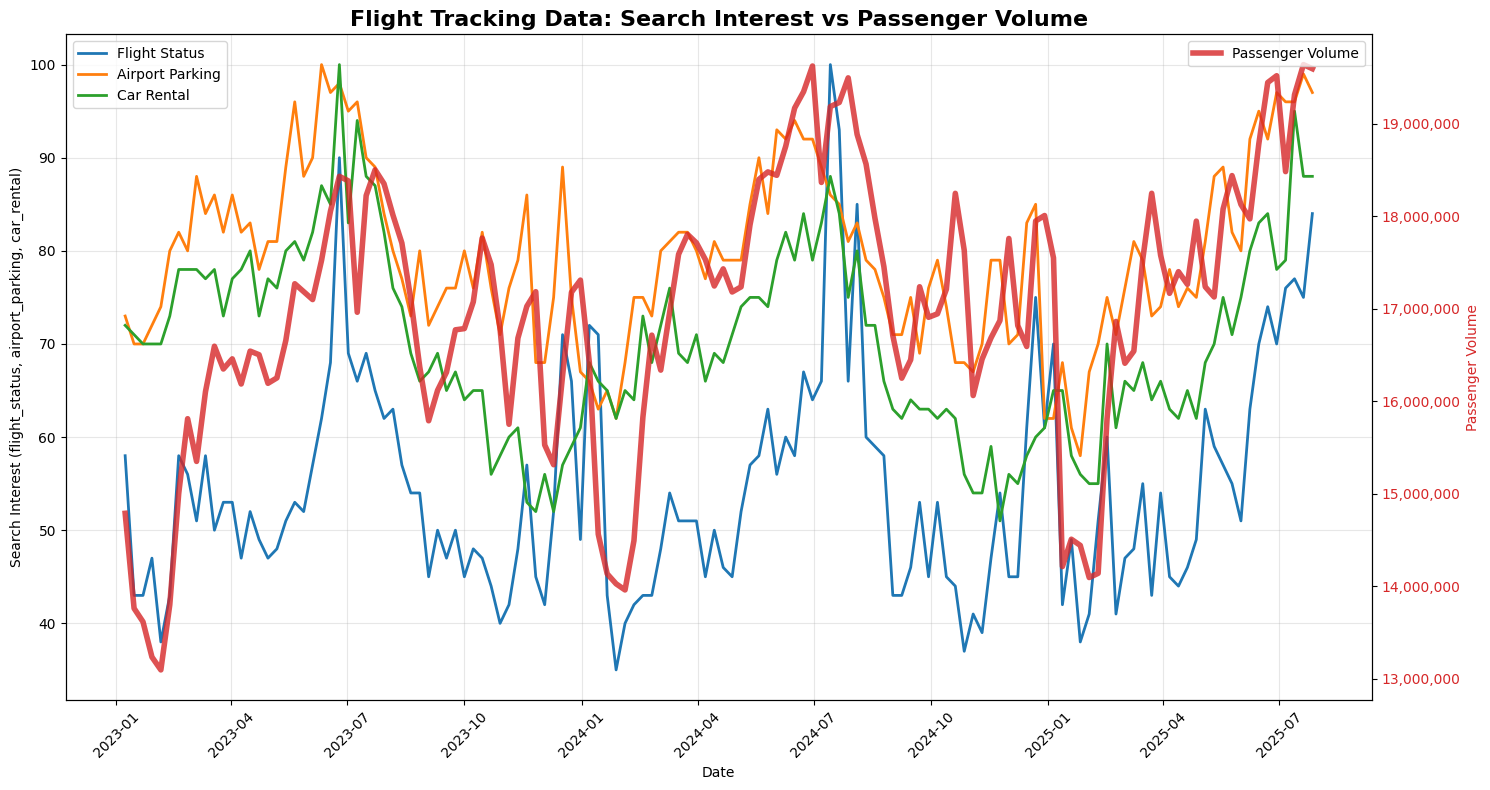

In [ ]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Create a comprehensive plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot flight_status, airport_parking, and car_rental on left y-axis
color1 = 'tab:blue'
color2 = 'tab:orange'
color3 = 'tab:green'

# First y-axis for google searches
ax1.set_xlabel('Date')
ax1.set_ylabel('Search Interest (flight_status, airport_parking, car_rental)', color='black')
ax1.plot(df['date'], df['flight_status'], color=color1, label='Flight Status', linewidth=2)
ax1.plot(df['date'], df['airport_parking'], color=color2, label='Airport Parking', linewidth=2)
ax1.plot(df['date'], df['car_rental'], color=color3, label='Car Rental', linewidth=2)
ax1.tick_params(axis='y', labelcolor='black')
ax1.legend(loc='upper left')

# Create second y-axis for passenger_volume
ax2 = ax1.twinx()
color4 = 'tab:red'
ax2.set_ylabel('Passenger Volume', color=color4)
ax2.plot(df['date'], df['weekly_passenger_volume'], color=color4, label='Passenger Volume', linewidth=4, alpha=0.8)
ax2.tick_params(axis='y', labelcolor=color4)

# Format
ax2.ticklabel_format(style='plain', axis='y')
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))
ax2.legend(loc='upper right')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
plt.title('Flight Tracking Data: Search Interest vs Passenger Volume', fontsize=16, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()
plt.show()


### It looks like these are correlated, but airport parking tends to move first. It may be a useful as a leading indicator

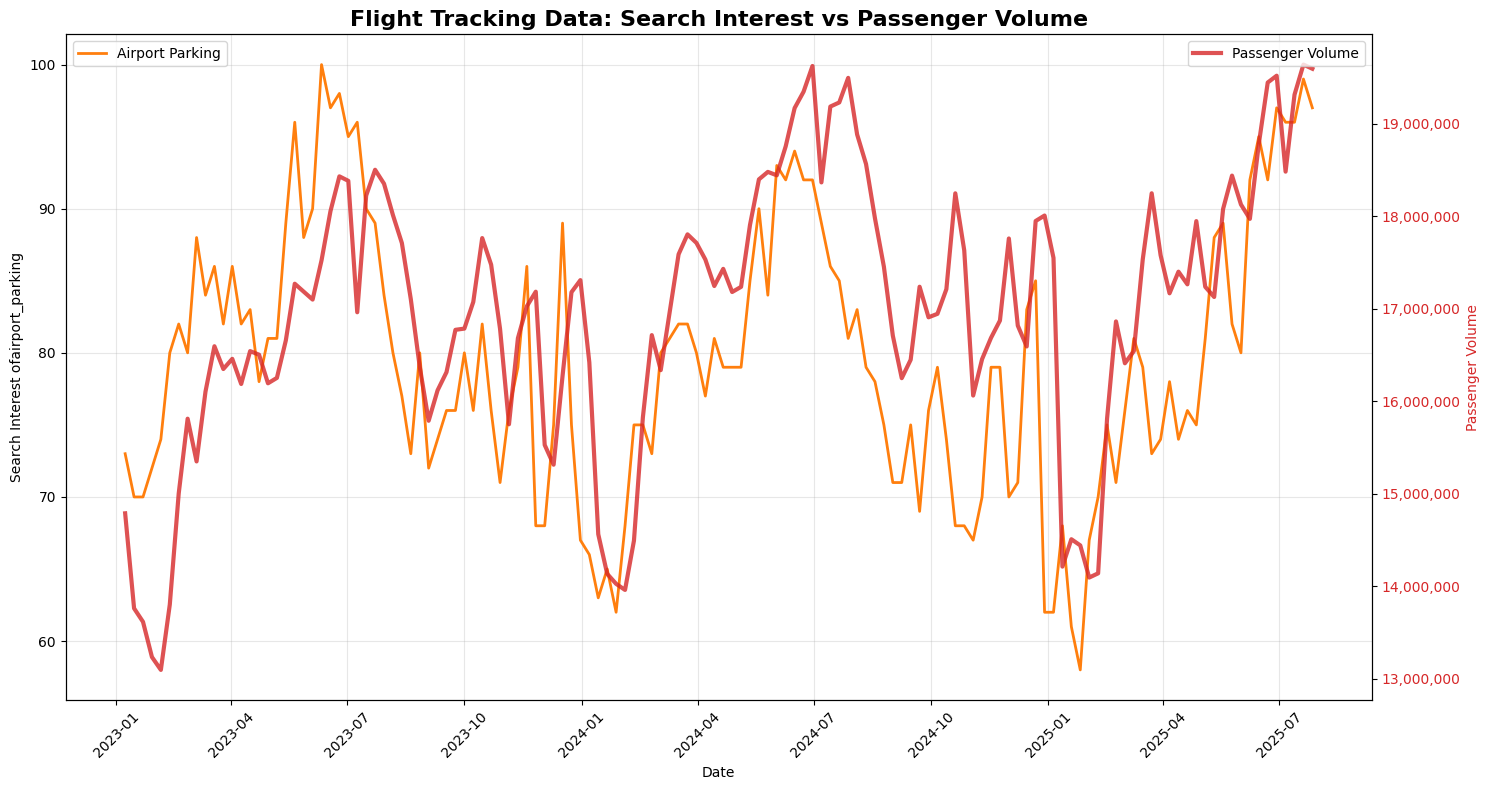

In [ ]:
# Plot only airport parking and passenger volume

fig, ax1 = plt.subplots(figsize=(15, 8))

color2 = 'tab:orange'

ax1.set_xlabel('Date')
ax1.set_ylabel('Search Interest ofairport_parking', color='black')
ax1.plot(df['date'], df['airport_parking'], color=color2, label='Airport Parking', linewidth=2)
ax1.tick_params(axis='y', labelcolor='black')
ax1.legend(loc='upper left')


ax2 = ax1.twinx()
color4 = 'tab:red'
ax2.set_ylabel('Passenger Volume', color=color4)
ax2.plot(df['date'], df['weekly_passenger_volume'], color=color4, label='Passenger Volume', linewidth=3, alpha=0.8)
ax2.tick_params(axis='y', labelcolor=color4)


ax2.ticklabel_format(style='plain', axis='y')
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

ax2.legend(loc='upper right')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
plt.title('Flight Tracking Data: Search Interest vs Passenger Volume', fontsize=16, fontweight='bold')
ax1.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Check stationarity of covariates and their first differences in case they are not stationary

STATIONARITY ANALYSIS FOR CROSS-CORRELATION
Null Hypothesis (H0): Series has a unit root (non-stationary)
Alternative Hypothesis (H1): Series is stationary
Significance Level: α = 0.05

STATIONARITY TEST: Weekly Passenger Volume
ADF Statistic: -3.6836179698547387
p-value: 0.004349572520238585
Critical Values:
	1%: -3.482087964046026
	5%: -2.8842185101614626
	10%: -2.578864381347275
STATIONARY: Reject null hypothesis (p=0.0043 ≤ 0.05)
   → Series appears to be stationary


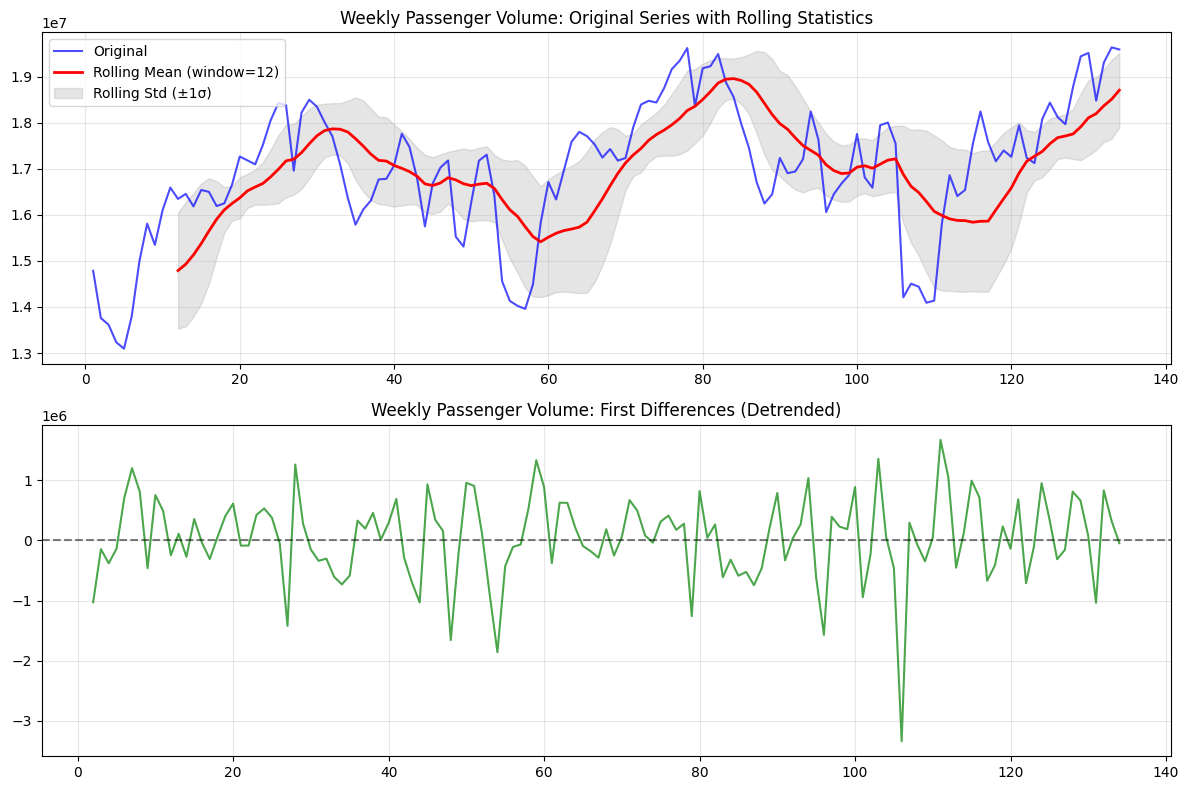


STATIONARITY TEST: Flight Status
ADF Statistic: -4.602624975859386
p-value: 0.00012773824549949304
Critical Values:
	1%: -3.480500383888377
	5%: -2.8835279559405045
	10%: -2.578495716547007
STATIONARY: Reject null hypothesis (p=0.0001 ≤ 0.05)
   → Series appears to be stationary


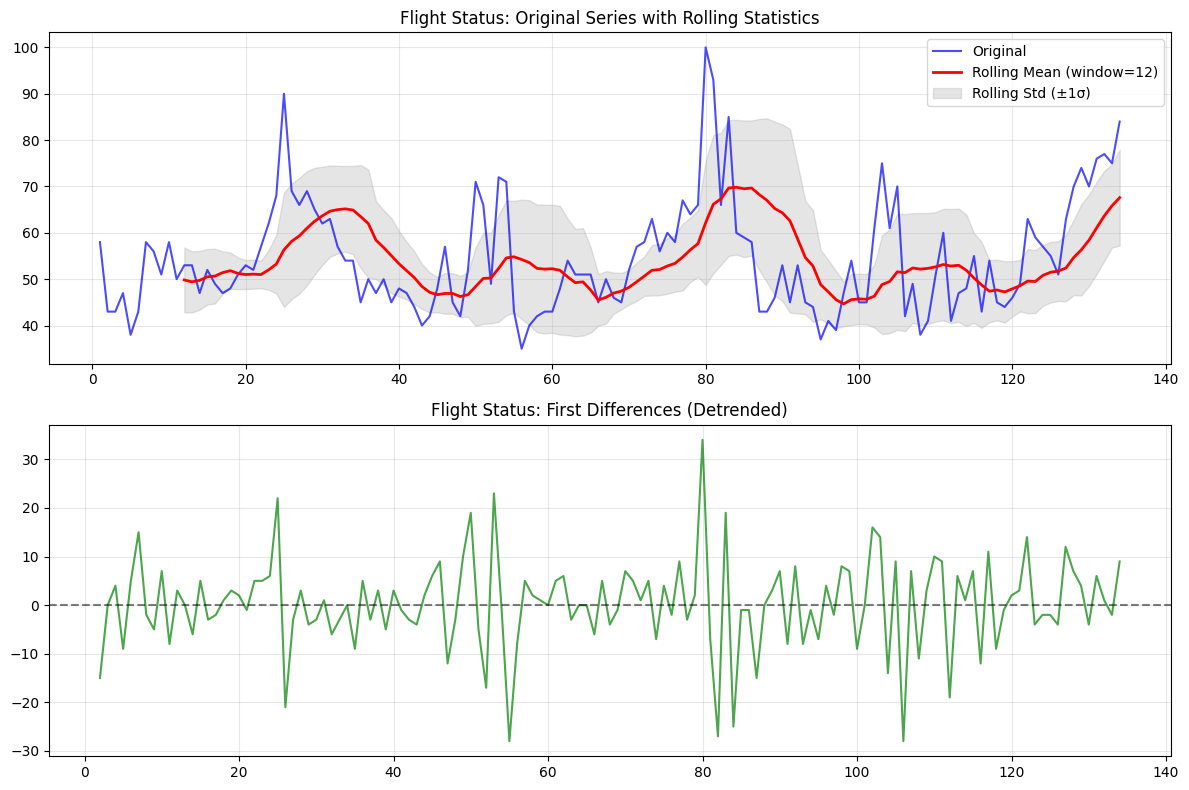


STATIONARITY TEST: Airport Parking
ADF Statistic: -2.5024469673620597
p-value: 0.11488008584255877
Critical Values:
	1%: -3.482087964046026
	5%: -2.8842185101614626
	10%: -2.578864381347275
NON-STATIONARY: Fail to reject null hypothesis (p=0.1149 > 0.05)
   → Series appears to have a unit root (non-stationary)


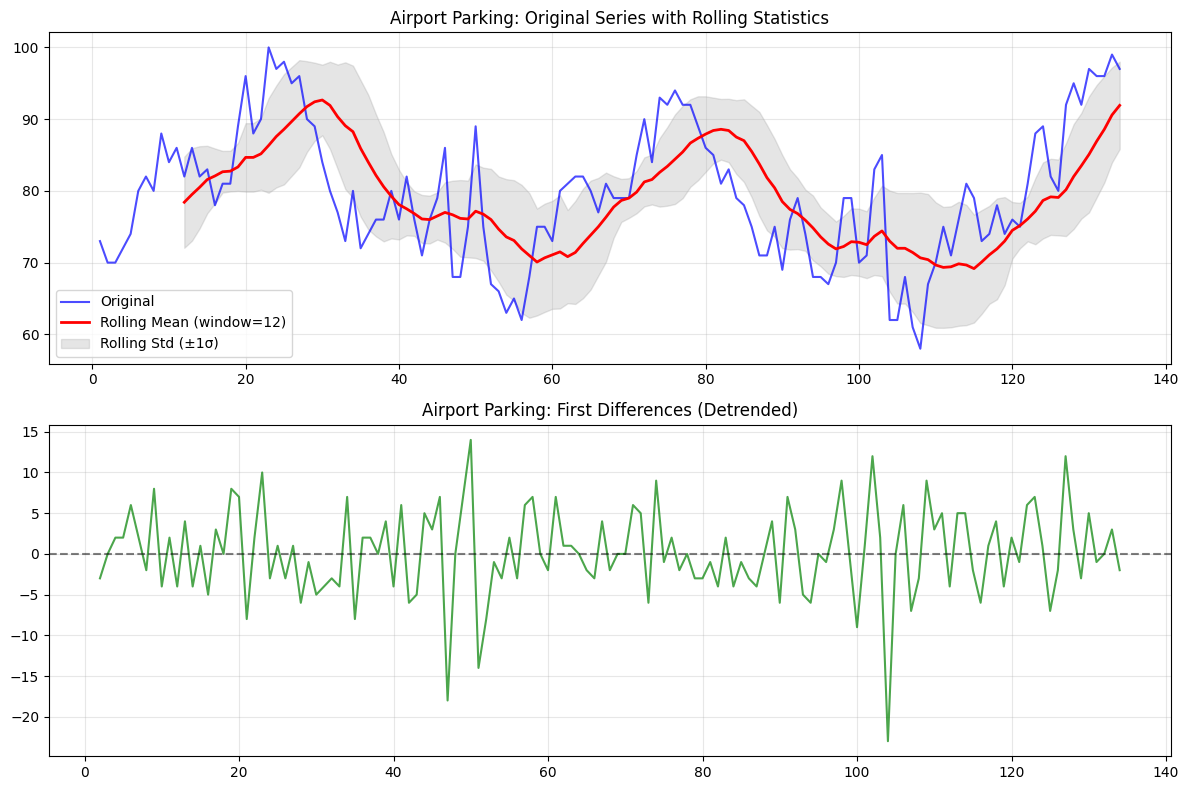


 Testing FIRST DIFFERENCES for airport_parking:

STATIONARITY TEST: airport_parking (First Differences)
ADF Statistic: -5.822451669715456
p-value: 4.152460280711966e-07
Critical Values:
	1%: -3.482087964046026
	5%: -2.8842185101614626
	10%: -2.578864381347275
STATIONARY: Reject null hypothesis (p=0.0000 ≤ 0.05)
   → Series appears to be stationary



STATIONARITY TEST: Car Rental
ADF Statistic: -1.4596352123036362
p-value: 0.5533764253499942
Critical Values:
	1%: -3.4808880719210005
	5%: -2.8836966192225284
	10%: -2.5785857598714417
NON-STATIONARY: Fail to reject null hypothesis (p=0.5534 > 0.05)
   → Series appears to have a unit root (non-stationary)


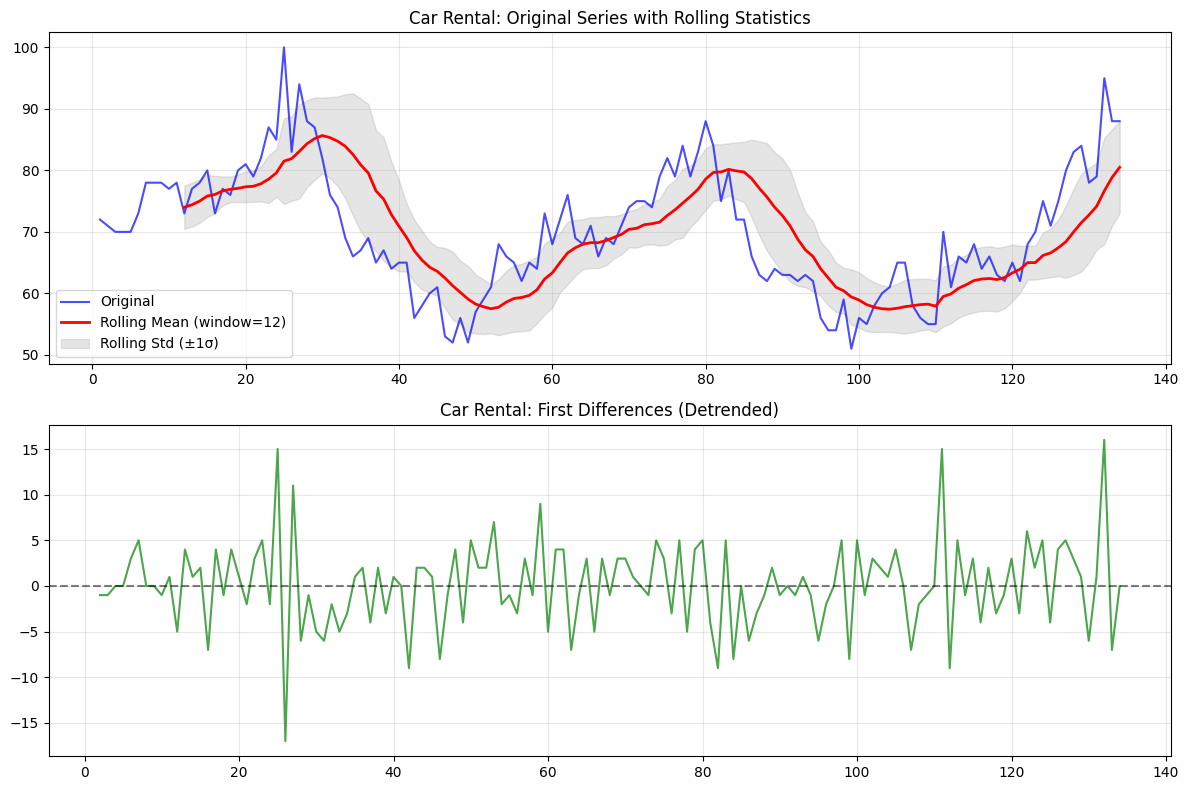


 Testing FIRST DIFFERENCES for car_rental:

STATIONARITY TEST: car_rental (First Differences)
ADF Statistic: -17.00874716565377
p-value: 8.622266850254456e-30
Critical Values:
	1%: -3.4808880719210005
	5%: -2.8836966192225284
	10%: -2.5785857598714417
STATIONARY: Reject null hypothesis (p=0.0000 ≤ 0.05)
   → Series appears to be stationary



STATIONARITY SUMMARY
Weekly Passenger Volume: Stationary
Flight Status       : Stationary
Airport Parking     : Non-stationary
Car Rental          : Non-stationary


In [5]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(timeseries, title):
    """
    Check stationarity using ADF test and visual inspection
    """
    print(f"\n{'='*50}")
    print(f"STATIONARITY TEST: {title}")
    print('='*50)
    
    # Perform Augmented Dickey-Fuller test
    result = adfuller(timeseries.dropna())
    
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    
    # Interpretation
    if result[1] <= 0.05:
        print(f"STATIONARY: Reject null hypothesis (p={result[1]:.4f} ≤ 0.05)")
        print("   → Series appears to be stationary")
    else:
        print(f"NON-STATIONARY: Fail to reject null hypothesis (p={result[1]:.4f} > 0.05)")
        print("   → Series appears to have a unit root (non-stationary)")
    
    return result[1] <= 0.05

def plot_stationarity_check(timeseries, title):
    """
    Visual check for stationarity with rolling statistics
    """
    # Calculate rolling statistics
    window = min(12, len(timeseries)//4)
    rolling_mean = timeseries.rolling(window=window).mean()
    rolling_std = timeseries.rolling(window=window).std()
    
    # Create subplot
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
    
    # Plot 1: Original series with rolling mean and std
    ax1.plot(timeseries.index, timeseries, color='blue', label='Original', alpha=0.7)
    ax1.plot(rolling_mean.index, rolling_mean, color='red', label=f'Rolling Mean (window={window})', linewidth=2)
    ax1.fill_between(timeseries.index, 
                     rolling_mean - rolling_std, 
                     rolling_mean + rolling_std, 
                     color='gray', alpha=0.2, label=f'Rolling Std (±1σ)')
    ax1.set_title(f'{title}: Original Series with Rolling Statistics')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: First differences (detrended)
    diff_series = timeseries.diff().dropna()
    ax2.plot(diff_series.index, diff_series, color='green', alpha=0.7)
    ax2.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    ax2.set_title(f'{title}: First Differences (Detrended)')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return diff_series

# Test all variables for stationarity
variables_to_test = ['weekly_passenger_volume', 'flight_status', 'airport_parking', 'car_rental']
stationarity_results = {}
transformed_data = {}

print("STATIONARITY ANALYSIS FOR CROSS-CORRELATION")
print("="*60)
print("Null Hypothesis (H0): Series has a unit root (non-stationary)")
print("Alternative Hypothesis (H1): Series is stationary")
print("Significance Level: α = 0.05")

for var in variables_to_test:
    # Test original series
    is_stationary = check_stationarity(df[var], var.replace('_', ' ').title())
    stationarity_results[var] = is_stationary
    
    # Visual check and get transformed data
    diff_series = plot_stationarity_check(df[var], var.replace('_', ' ').title())
    transformed_data[f'{var}_diff'] = diff_series
    
    # Test first differences if original is non-stationary
    if not is_stationary:
        print(f"\n Testing FIRST DIFFERENCES for {var}:")
        diff_stationary = check_stationarity(diff_series, f"{var} (First Differences)")
        stationarity_results[f'{var}_diff'] = diff_stationary
        print("\n")

# Summary
print(f"\n{'='*60}")
print("STATIONARITY SUMMARY")
print('='*60)

stationary_vars = []
non_stationary_vars = []

for var, is_stationary in stationarity_results.items():
    if '_diff' not in var:
        status = "Stationary" if is_stationary else "Non-stationary"
        print(f"{var.replace('_', ' ').title():20}: {status}")
        
        if is_stationary:
            stationary_vars.append(var)
        else:
            non_stationary_vars.append(var)

## Correlation between interest over time and passenger data (without removing stationarity)

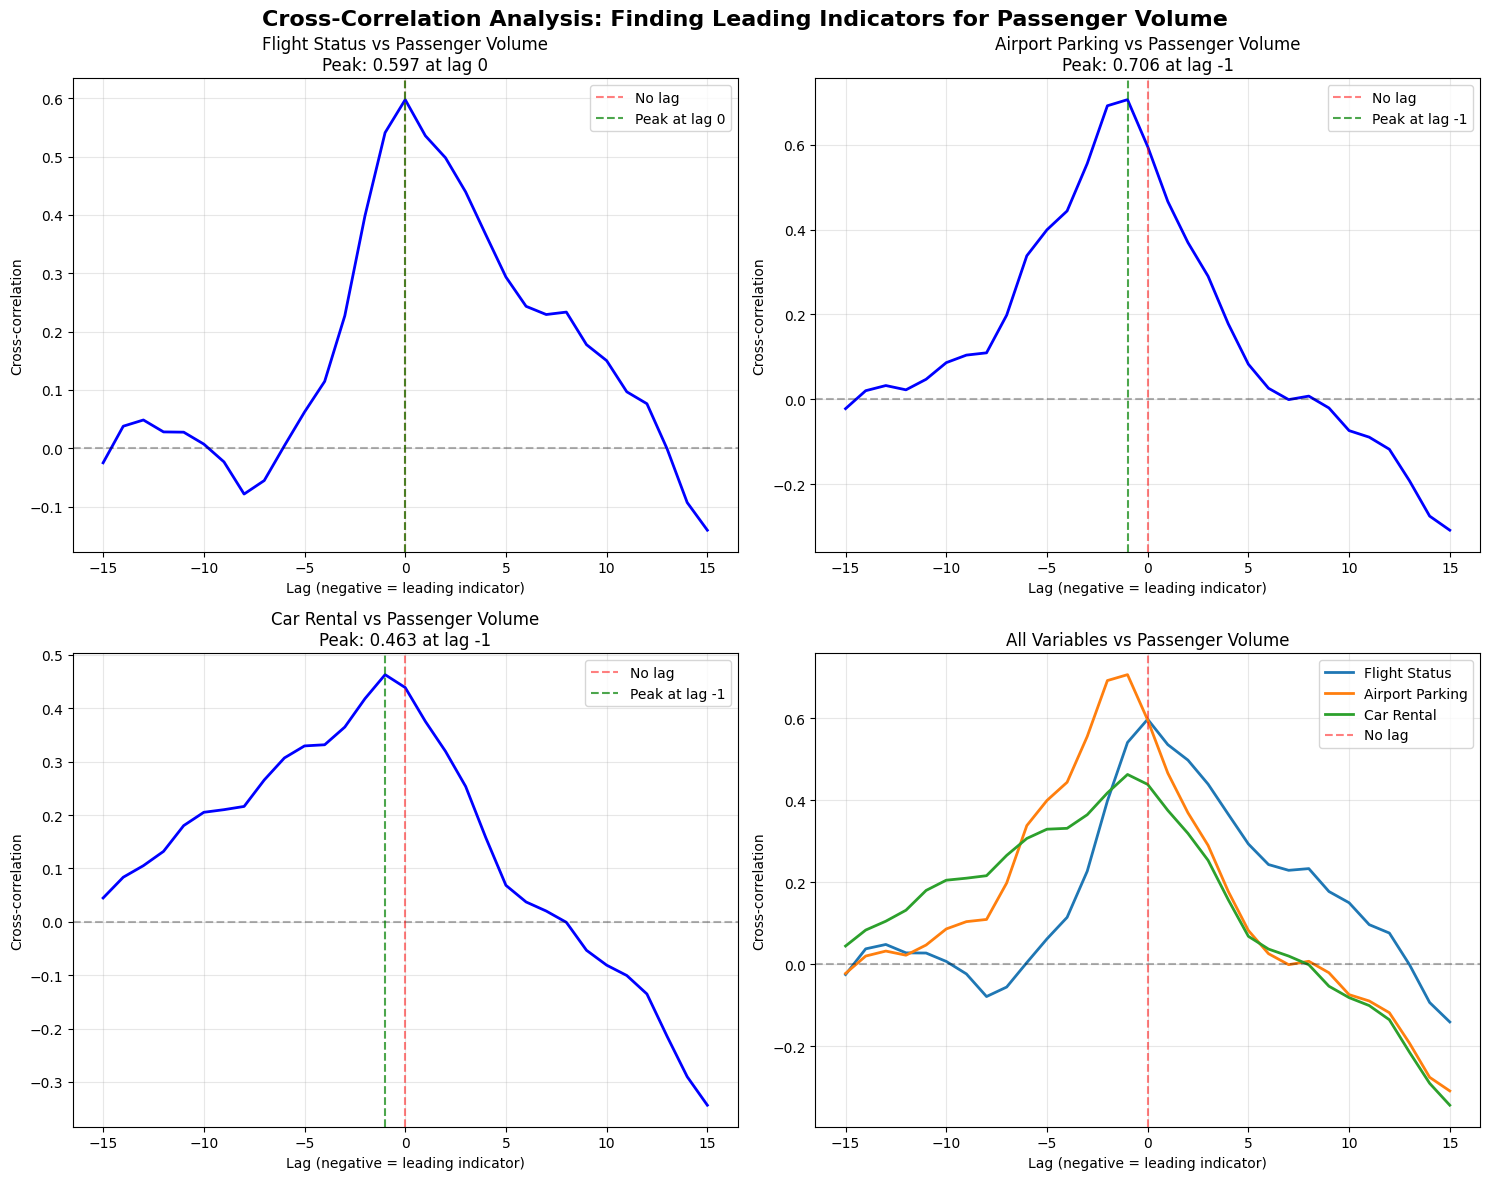


Best leading indicator: ('airport_parking', {'lag': -1, 'correlation': 0.7061828337834808})


In [6]:
from scipy.signal import correlate

def cross_correlation(x, y, max_lag=20):
    """
    Calculate cross-correlation between two time series
    Positive lags mean x leads y, negative lags mean y leads x
    """
    # Normalize the series
    x_norm = (x - np.mean(x)) / np.std(x)
    y_norm = (y - np.mean(y)) / np.std(y)
    
    # Calculate cross-correlation
    correlation = correlate(x_norm, y_norm, mode='full')
    correlation = correlation / len(x_norm)
    
    # Create lag array
    lags = np.arange(-len(x_norm) + 1, len(x_norm))
    
    # Trim to desired lag range
    center = len(correlation) // 2
    start = max(0, center - max_lag)
    end = min(len(correlation), center + max_lag + 1)
    
    return lags[start:end], correlation[start:end]

# Variables to analyze
variables = ['flight_status', 'airport_parking', 'car_rental']
passenger_vol = df['weekly_passenger_volume'].values

# Create subplots for cross-correlation analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Cross-Correlation Analysis: Finding Leading Indicators for Passenger Volume', fontsize=16, fontweight='bold')

results = {}

for i, var in enumerate(variables):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    # Get cross-correlation
    lags, xcorr = cross_correlation(df[var].values, passenger_vol, max_lag=15)
    
    # Find peak correlation and its lag
    max_idx = np.argmax(np.abs(xcorr))
    max_lag = lags[max_idx]
    max_corr = xcorr[max_idx]
    
    # Store results
    results[var] = {'lag': max_lag, 'correlation': max_corr}
    
    # Plot
    ax.plot(lags, xcorr, 'b-', linewidth=2)
    ax.axhline(y=0, color='k', linestyle='--', alpha=0.3)
    ax.axvline(x=0, color='r', linestyle='--', alpha=0.5, label='No lag')
    ax.axvline(x=max_lag, color='g', linestyle='--', alpha=0.7, label=f'Peak at lag {max_lag}')
    
    ax.set_xlabel('Lag (negative = leading indicator)')
    ax.set_ylabel('Cross-correlation')
    ax.set_title(f'{var.replace("_", " ").title()} vs Passenger Volume\nPeak: {max_corr:.3f} at lag {max_lag}')
    ax.legend()
    ax.grid(True, alpha=0.3)

# Summary plot showing all correlations at different lags
ax = axes[1, 1]
for var in variables:
    lags, xcorr = cross_correlation(df[var].values, passenger_vol, max_lag=15)
    ax.plot(lags, xcorr, linewidth=2, label=var.replace('_', ' ').title())

ax.axhline(y=0, color='k', linestyle='--', alpha=0.3)
ax.axvline(x=0, color='r', linestyle='--', alpha=0.5, label='No lag')
ax.set_xlabel('Lag (negative = leading indicator)')
ax.set_ylabel('Cross-correlation')
ax.set_title('All Variables vs Passenger Volume')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nBest leading indicator: {max(results.items(), key=lambda x: abs(x[1]['correlation']) if x[1]['lag'] < 0 else 0)}")


## Seasonal detrending

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

# df = df.set_index("date")

result = seasonal_decompose(df["weekly_passenger_volume"], model='multiplicative', period=52)
deseasonalized_p = df["weekly_passenger_volume"] - result.seasonal

result = seasonal_decompose(df["airport_parking"], model='multiplicative', period=52)
deseasonalized_a = df["airport_parking"] - result.seasonal

result = seasonal_decompose(df["car_rental"], model='multiplicative', period=52)
deseasonalized_c = df["car_rental"] - result.seasonal

result = seasonal_decompose(df["flight_status"], model='multiplicative', period=52)
deseasonalized_f = df["flight_status"] - result.seasonal

df_2 = df.copy()

df_2["weekly_passenger_volume"] = deseasonalized_p
df_2["airport_parking"] = deseasonalized_a
df_2["car_rental"] = deseasonalized_c
df_2["flight_status"] = deseasonalized_f

df_seasonal_detrend = df_2.diff().dropna()

In [26]:
df_seasonal_detrend

,flight_status,airport_parking,car_rental,weekly_passenger_volume
date,,,,
2023-01-15,-14.728950,-3.019680,-0.985981,-1.027224e+06
2023-01-22,0.203733,0.033621,-0.939183,-1.458340e+05
2023-01-29,4.180015,2.039606,0.037394,-3.801650e+05
2023-02-05,-9.065213,1.903790,-0.073970,-1.393610e+05
2023-02-12,4.966058,5.911465,3.014859,7.053410e+05
...,...,...,...,...
2025-06-29,-3.939330,5.000732,-5.926470,7.361898e+04
2025-07-06,5.954452,-0.981878,0.896987,-1.036893e+06
2025-07-13,0.654566,0.055492,16.003883,8.317039e+05


STATIONARITY ANALYSIS FOR CROSS-CORRELATION
Null Hypothesis (H0): Series has a unit root (non-stationary)
Alternative Hypothesis (H1): Series is stationary
Significance Level: α = 0.05

STATIONARITY TEST: Weekly Passenger Volume
ADF Statistic: -5.932642988780944
p-value: 2.3607263782975602e-07
Critical Values:
	1%: -3.482920063655088
	5%: -2.884580323367261
	10%: -2.5790575441750883
STATIONARY: Reject null hypothesis (p=0.0000 ≤ 0.05)
   → Series appears to be stationary


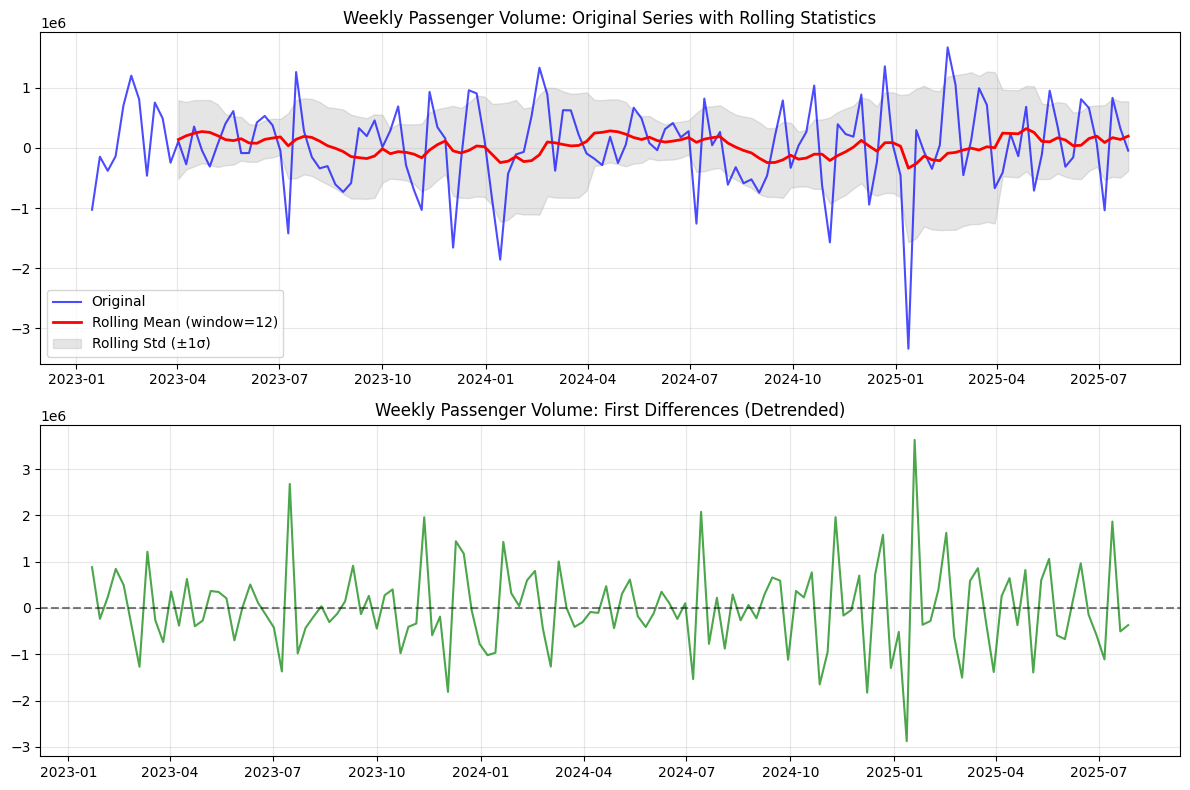


STATIONARITY TEST: Flight Status
ADF Statistic: -11.158290655840105
p-value: 2.829524653495677e-20
Critical Values:
	1%: -3.481281802271349
	5%: -2.883867891664528
	10%: -2.5786771965503177
STATIONARY: Reject null hypothesis (p=0.0000 ≤ 0.05)
   → Series appears to be stationary


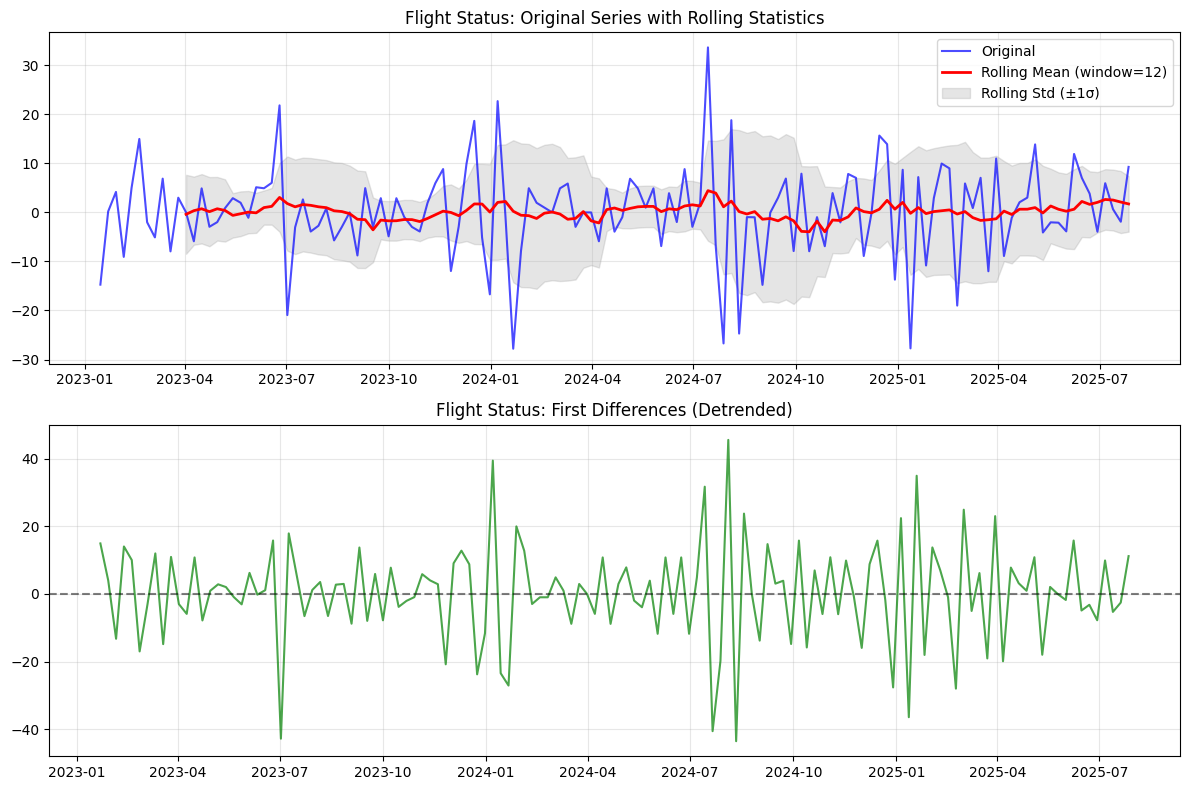


STATIONARITY TEST: Airport Parking
ADF Statistic: -5.835469088674753
p-value: 3.885840565973783e-07
Critical Values:
	1%: -3.482087964046026
	5%: -2.8842185101614626
	10%: -2.578864381347275
STATIONARY: Reject null hypothesis (p=0.0000 ≤ 0.05)
   → Series appears to be stationary


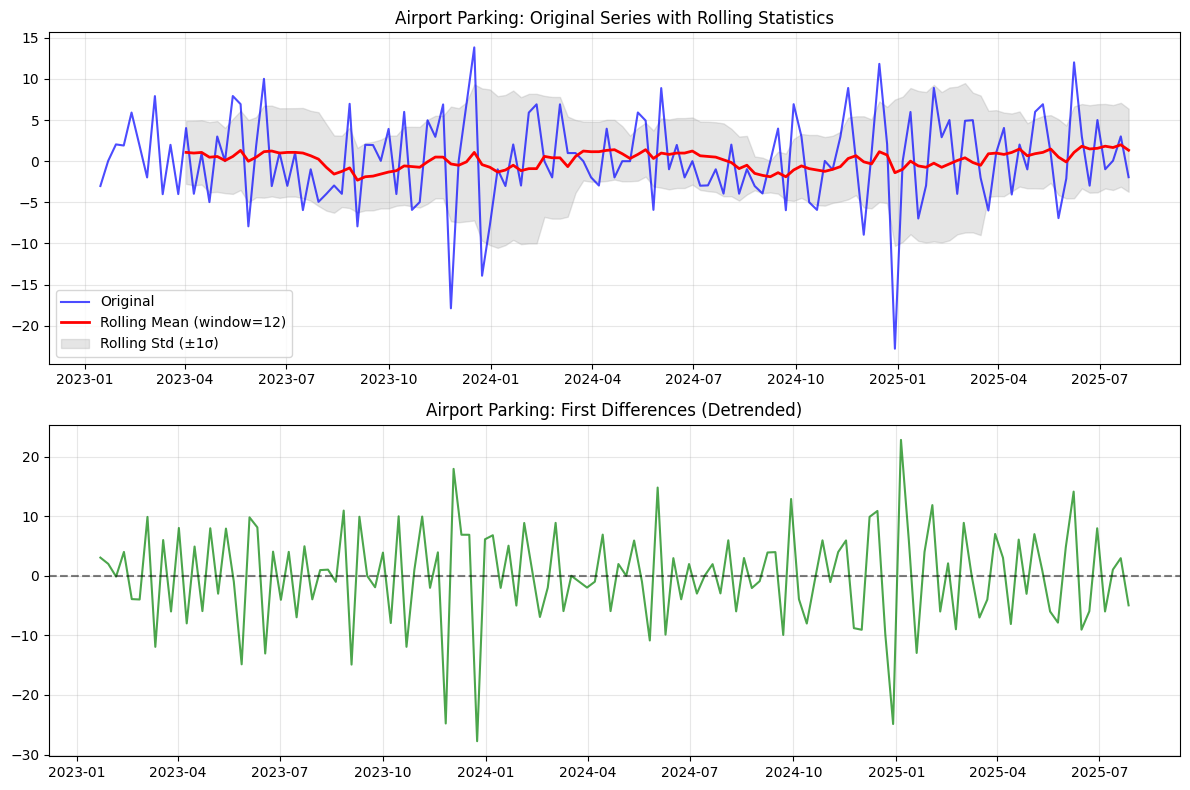


STATIONARITY TEST: Car Rental
ADF Statistic: -17.05267213552077
p-value: 8.049398810371216e-30
Critical Values:
	1%: -3.4808880719210005
	5%: -2.8836966192225284
	10%: -2.5785857598714417
STATIONARY: Reject null hypothesis (p=0.0000 ≤ 0.05)
   → Series appears to be stationary


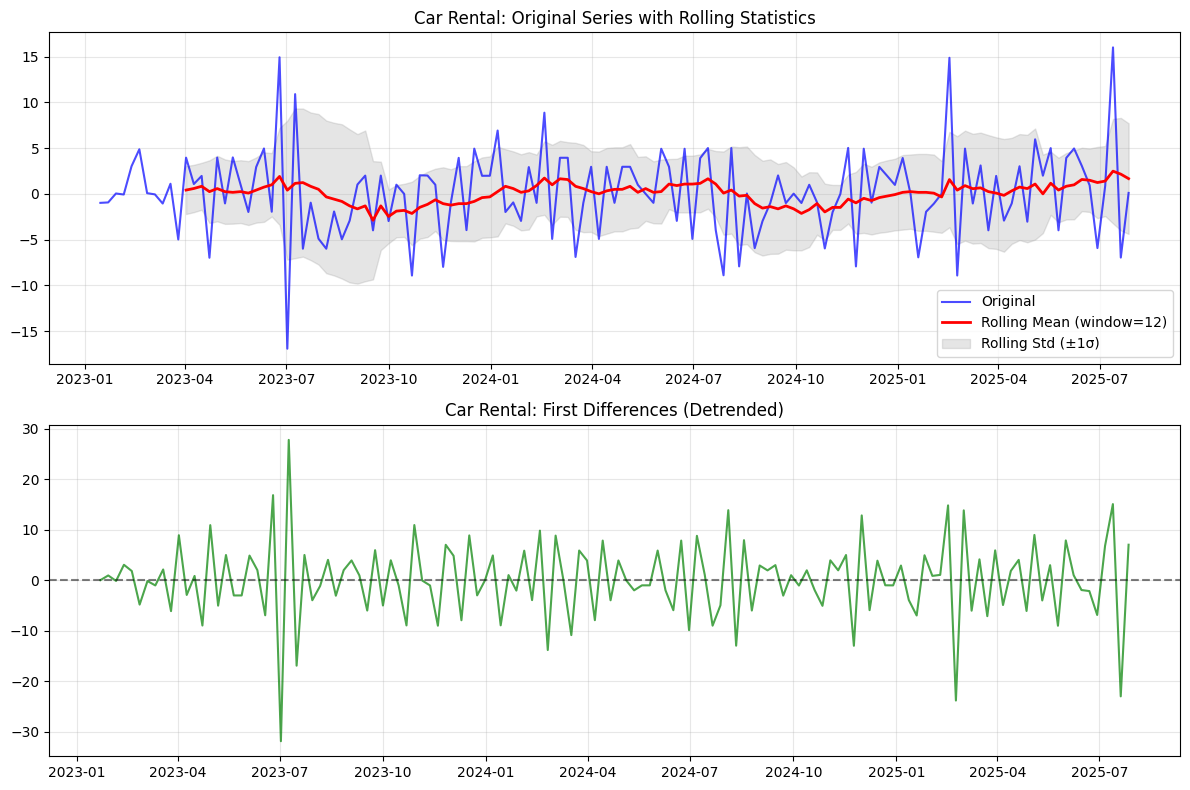


STATIONARITY SUMMARY
Weekly Passenger Volume: ✅ Stationary
Flight Status       : ✅ Stationary
Airport Parking     : ✅ Stationary
Car Rental          : ✅ Stationary

📋 RECOMMENDATIONS FOR CROSS-CORRELATION:
✅ All variables are stationary - proceed with cross-correlation!
✅ Stationary variables: weekly_passenger_volume, flight_status, airport_parking, car_rental


In [27]:
# Test all variables for stationarity
variables_to_test = ['weekly_passenger_volume', 'flight_status', 'airport_parking', 'car_rental']
stationarity_results = {}
transformed_data = {}

print("STATIONARITY ANALYSIS FOR CROSS-CORRELATION")
print("="*60)
print("Null Hypothesis (H0): Series has a unit root (non-stationary)")
print("Alternative Hypothesis (H1): Series is stationary")
print("Significance Level: α = 0.05")

for var in variables_to_test:
    # Test original series
    is_stationary = check_stationarity(df_seasonal_detrend[var], var.replace('_', ' ').title())
    stationarity_results[var] = is_stationary
    
    # Visual check and get transformed data
    diff_series = plot_stationarity_check(df_seasonal_detrend[var], var.replace('_', ' ').title())
    transformed_data[f'{var}_diff'] = diff_series
    
    # Test first differences if original is non-stationary
    if not is_stationary:
        print(f"\n📊 Testing FIRST DIFFERENCES for {var}:")
        diff_stationary = check_stationarity(diff_series, f"{var} (First Differences)")
        stationarity_results[f'{var}_diff'] = diff_stationary

# Summary
print(f"\n{'='*60}")
print("STATIONARITY SUMMARY")
print('='*60)

stationary_vars = []
non_stationary_vars = []

for var, is_stationary in stationarity_results.items():
    if '_diff' not in var:  # Only original variables
        status = "✅ Stationary" if is_stationary else "❌ Non-stationary"
        print(f"{var.replace('_', ' ').title():20}: {status}")
        
        if is_stationary:
            stationary_vars.append(var)
        else:
            non_stationary_vars.append(var)

print(f"\n📋 RECOMMENDATIONS FOR CROSS-CORRELATION:")
if non_stationary_vars:
    print("⚠️  Non-stationary variables detected!")
    print("   → Consider using first differences for cross-correlation")
    print("   → Or apply other transformations (log, detrending)")
    print(f"   → Non-stationary: {', '.join(non_stationary_vars)}")
else:
    print("✅ All variables are stationary - proceed with cross-correlation!")

if stationary_vars:
    print(f"✅ Stationary variables: {', '.join(stationary_vars)}")

# Store results for potential use in corrected cross-correlation
globals()['stationarity_results'] = stationarity_results
globals()['transformed_data'] = transformed_data


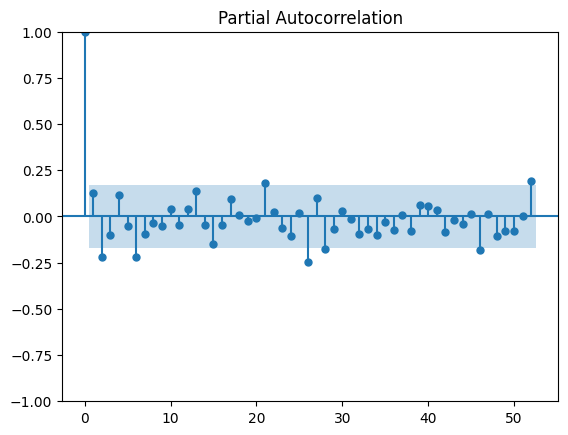

In [28]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df_seasonal_detrend["weekly_passenger_volume"], lags=52)
plt.show()

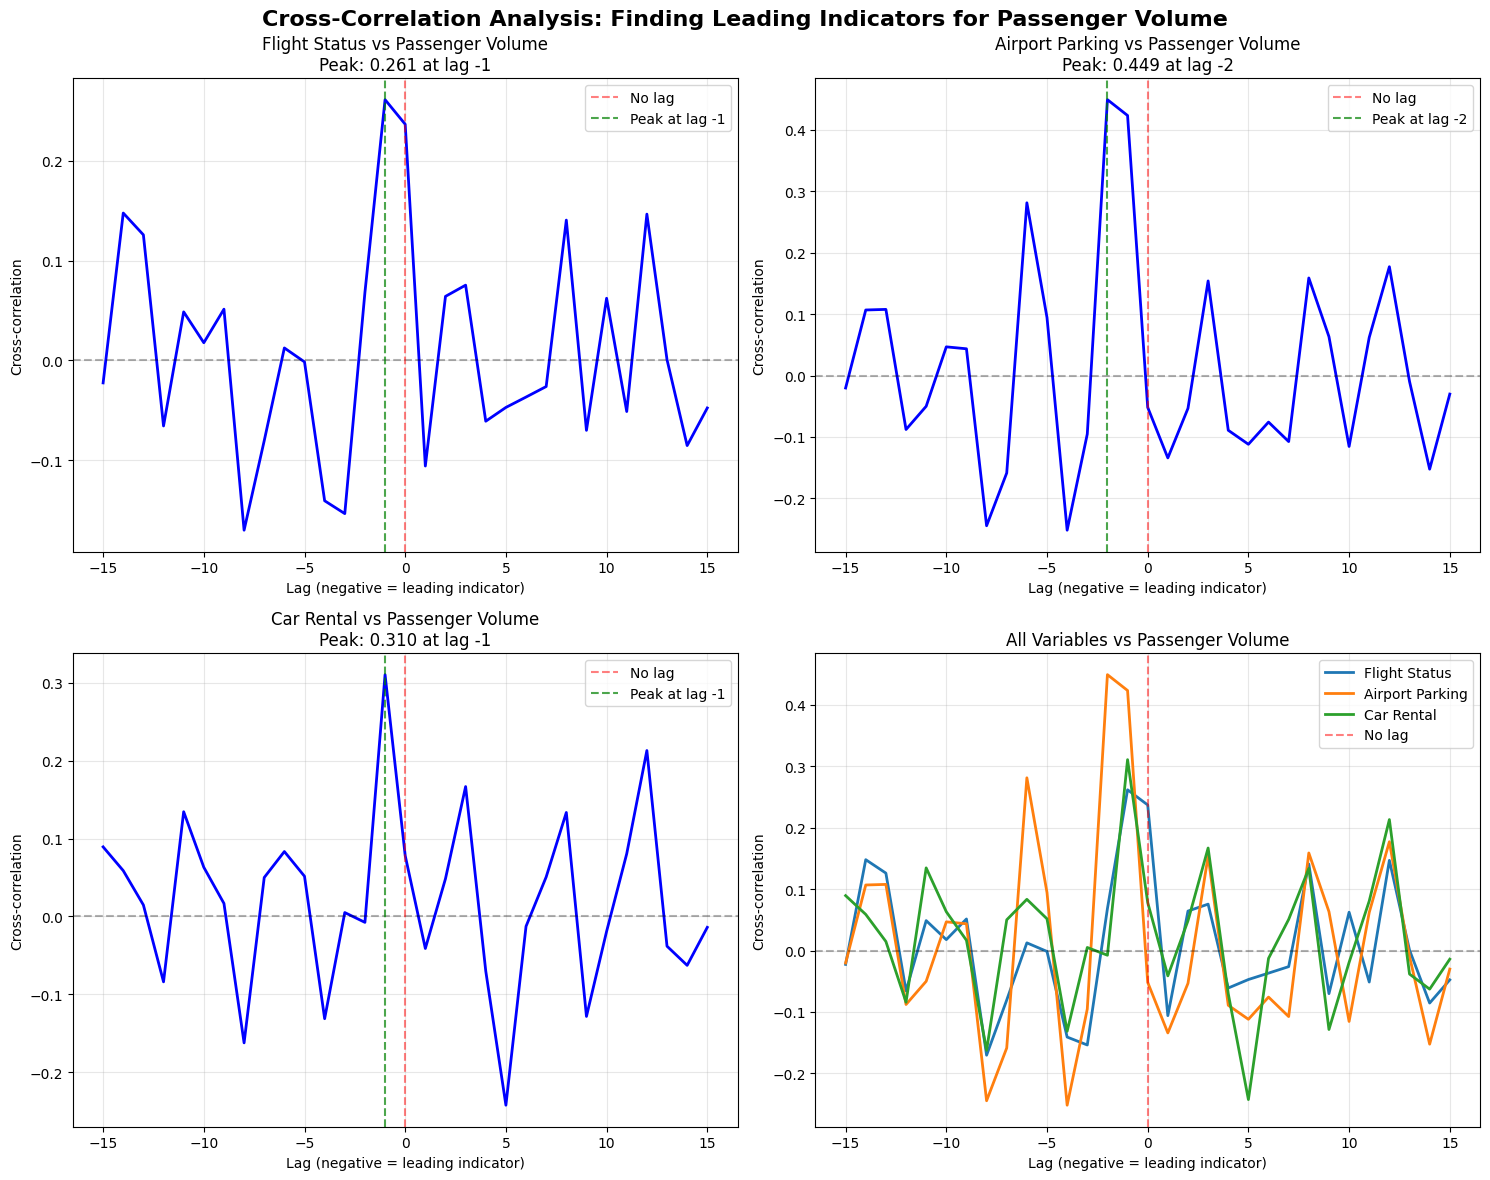


Best leading indicator: ('airport_parking', {'lag': -2, 'correlation': 0.4486839992048527})


In [30]:
# Variables to analyze
variables = ['flight_status', 'airport_parking', 'car_rental']
passenger_vol = df_seasonal_detrend['weekly_passenger_volume'].values

# Create subplots for cross-correlation analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Cross-Correlation Analysis: Finding Leading Indicators for Passenger Volume', fontsize=16, fontweight='bold')

results = {}

for i, var in enumerate(variables):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    # Get cross-correlation
    lags, xcorr = cross_correlation(df_seasonal_detrend[var].values, passenger_vol, max_lag=15)
    
    # Find peak correlation and its lag
    max_idx = np.argmax(np.abs(xcorr))
    max_lag = lags[max_idx]
    max_corr = xcorr[max_idx]
    
    # Store results
    results[var] = {'lag': max_lag, 'correlation': max_corr}
    
    # Plot
    ax.plot(lags, xcorr, 'b-', linewidth=2)
    ax.axhline(y=0, color='k', linestyle='--', alpha=0.3)
    ax.axvline(x=0, color='r', linestyle='--', alpha=0.5, label='No lag')
    ax.axvline(x=max_lag, color='g', linestyle='--', alpha=0.7, label=f'Peak at lag {max_lag}')
    
    ax.set_xlabel('Lag (negative = leading indicator)')
    ax.set_ylabel('Cross-correlation')
    ax.set_title(f'{var.replace("_", " ").title()} vs Passenger Volume\nPeak: {max_corr:.3f} at lag {max_lag}')
    ax.legend()
    ax.grid(True, alpha=0.3)

# Summary plot showing all correlations at different lags
ax = axes[1, 1]
for var in variables:
    lags, xcorr = cross_correlation(df_seasonal_detrend[var].values, passenger_vol, max_lag=15)
    ax.plot(lags, xcorr, linewidth=2, label=var.replace('_', ' ').title())

ax.axhline(y=0, color='k', linestyle='--', alpha=0.3)
ax.axvline(x=0, color='r', linestyle='--', alpha=0.5, label='No lag')
ax.set_xlabel('Lag (negative = leading indicator)')
ax.set_ylabel('Cross-correlation')
ax.set_title('All Variables vs Passenger Volume')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nBest leading indicator: {max(results.items(), key=lambda x: abs(x[1]['correlation']) if x[1]['lag'] < 0 else 0)}")

## ARDL

ARDL MODEL ANALYSIS: Airport Parking Searches vs Passenger Volume
STEP 1: ARDL MODEL ESTIMATION
-----------------------------------
  ARDL(1,0): AIC = 3928.45, R² = 0.8243
  ARDL(1,1): AIC = 3911.25, R² = 0.8479
  ARDL(1,2): AIC = 3876.52, R² = 0.8518
  ARDL(2,0): AIC = 3892.95, R² = 0.8296
  ARDL(2,1): AIC = 3875.75, R² = 0.8526
  ARDL(2,2): AIC = 3874.68, R² = 0.8560
  ARDL(3,0): AIC = 3862.64, R² = 0.8272
  ARDL(3,1): AIC = 3844.74, R² = 0.8515
  ARDL(3,2): AIC = 3844.52, R² = 0.8540
  ARDL(4,0): AIC = 3830.58, R² = 0.8248
  ARDL(4,1): AIC = 3812.96, R² = 0.8493
  ARDL(4,2): AIC = 3813.28, R² = 0.8512

Successfully estimated 12 models
Best model: ARDL(4, 1) with AIC = 3812.9618

Top 3 Models by AIC:
  1. ARDL(4,1): AIC = 3812.96, R² = 0.8493
  2. ARDL(4,2): AIC = 3813.28, R² = 0.8512
  3. ARDL(4,0): AIC = 3830.58, R² = 0.8248

STEP 2: MODEL RESULTS
--------------------
ARDL(4,1) Model Results:
                            OLS Regression Results                            
Dep. Variab

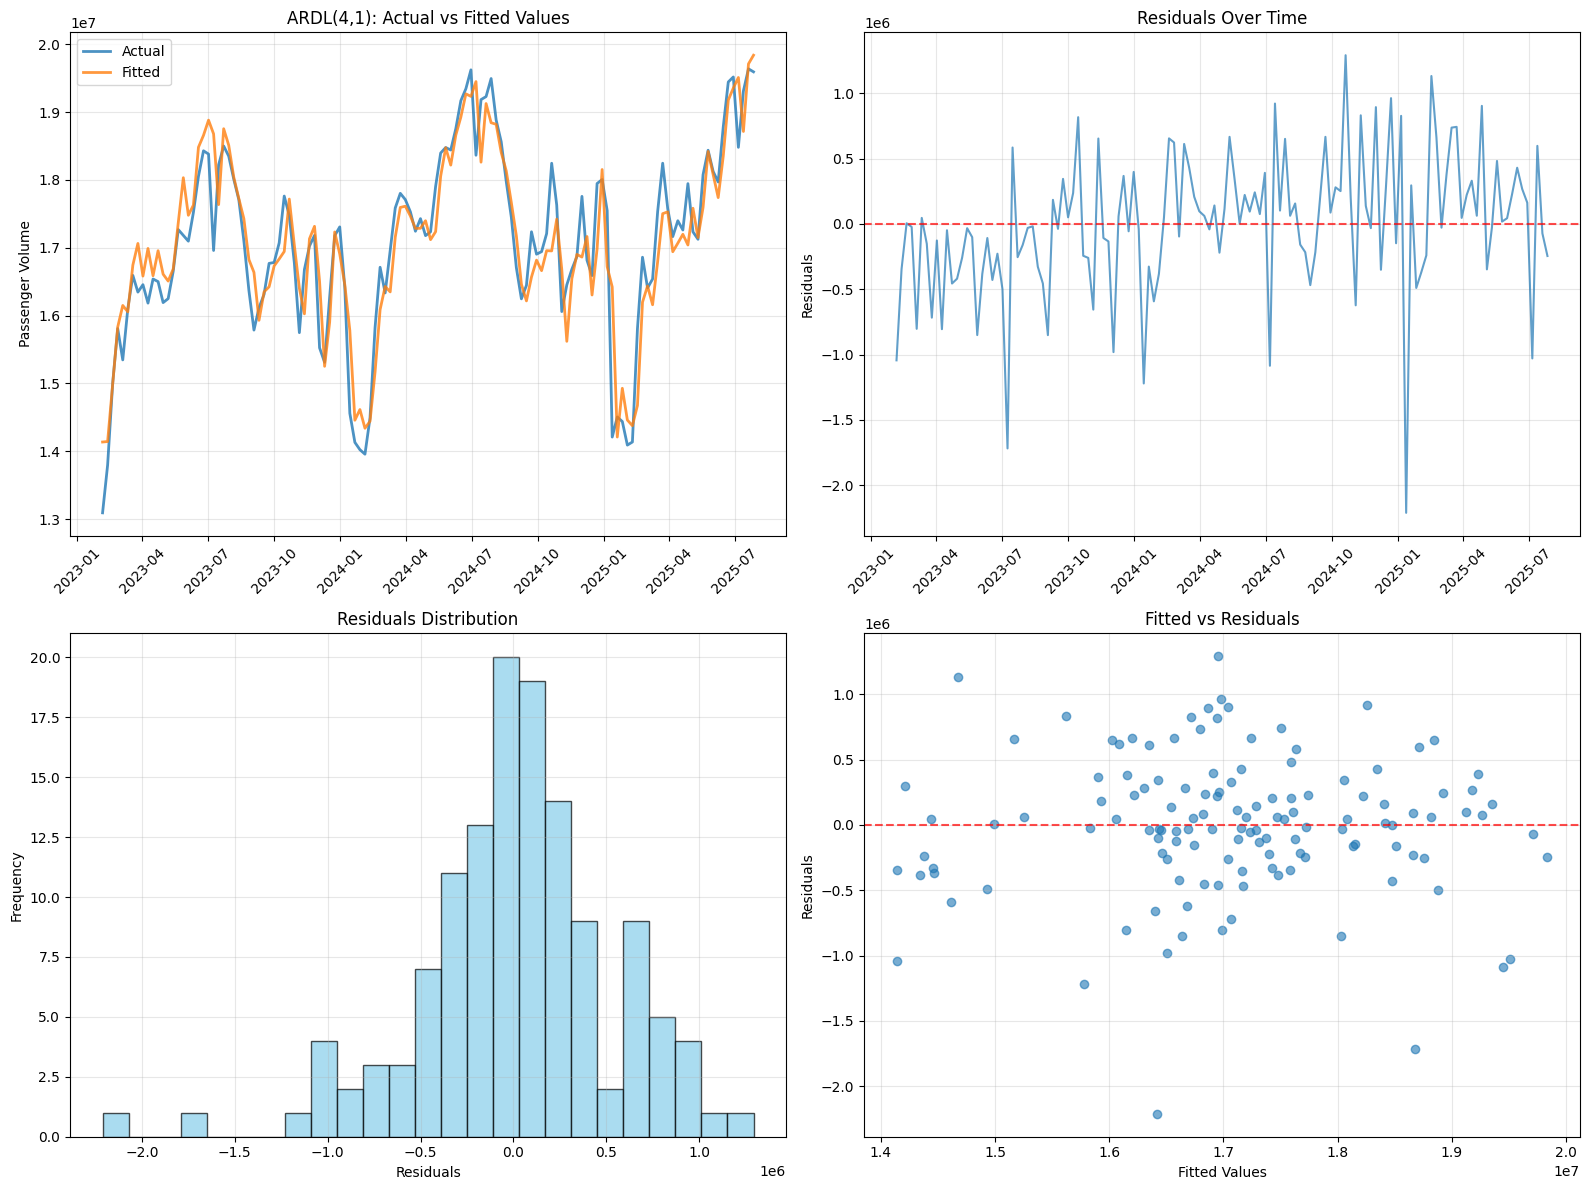


ARDL ANALYSIS SUMMARY
Best Model: ARDL(4,1)
Model Fit: R² = 84.9%, MAPE = 2.34%


In [42]:
from statsmodels.tsa.ardl import ARDL
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.regression.linear_model import OLS
import warnings
warnings.filterwarnings('ignore')

print("ARDL MODEL ANALYSIS: Airport Parking Searches vs Passenger Volume")
print("="*70)

# Extract the relevant variables
endog = df['weekly_passenger_volume']
exog = df['airport_parking']

print("STEP 1: ARDL MODEL ESTIMATION")
print("-" * 35)

ardl_results = {}
best_aic = float('inf')
best_model = None
best_lags = None

# Test reasonable lag combinations for weekly data
lag_combinations = [
    (1, 0), (1, 1), (1, 2),
    (2, 0), (2, 1), (2, 2), 
    (3, 0), (3, 1), (3, 2),
    (4, 0), (4, 1), (4, 2)
]

successful_models = 0

# Run ARDL with different lags
for p, q in lag_combinations:
    data_ardl = pd.DataFrame({
        'y': endog,
        'x': exog
    })
    
    # Add lags
    for i in range(1, max(p, q) + 1):
        data_ardl[f'y_lag{i}'] = data_ardl['y'].shift(i)
        data_ardl[f'x_lag{i}'] = data_ardl['x'].shift(i)
    
    # Drop missing values
    data_ardl = data_ardl.dropna()
    
    # Build regression equation
    dep_var = data_ardl['y']
    X = pd.DataFrame(index=data_ardl.index)
    X['const'] = 1
    
    # Add lagged dependent variables
    for i in range(1, p + 1):
        X[f'y_lag{i}'] = data_ardl[f'y_lag{i}']
    
    # Add current and lagged independent variables
    X['x'] = data_ardl['x']
    for i in range(1, q + 1):
        X[f'x_lag{i}'] = data_ardl[f'x_lag{i}']
    
    # Estimate OLS model
    model_ols = OLS(dep_var, X).fit()
    
    ardl_results[(p, q)] = {
        'model': model_ols,
        'aic': model_ols.aic,
        'bic': model_ols.bic,
        'rsquared': model_ols.rsquared
    }
    
    successful_models += 1
    print(f"  ARDL({p},{q}): AIC = {model_ols.aic:.2f}, R² = {model_ols.rsquared:.4f}")
    
    if model_ols.aic < best_aic:
        best_aic = model_ols.aic
        best_model = model_ols
        best_lags = (p, q)

if best_model is None:
    print("ERROR: No ARDL model could be estimated successfully.")
    exit(1)

print(f"\nSuccessfully estimated {successful_models} models")
print(f"Best model: ARDL{best_lags} with AIC = {best_aic:.4f}")

# Show top 3 models by AIC
print("\nTop 3 Models by AIC:")
sorted_models = sorted(ardl_results.items(), key=lambda x: x[1]['aic'])[:3]
for i, ((p, q), results) in enumerate(sorted_models, 1):
    print(f"  {i}. ARDL({p},{q}): AIC = {results['aic']:.2f}, R² = {results['rsquared']:.4f}")

print()
print("STEP 2: MODEL RESULTS")
print("-" * 20)

print(f"ARDL({best_lags[0]},{best_lags[1]}) Model Results:")
print("=" * 45)
print(best_model.summary())

print()
print("STEP 3: COEFFICIENT INTERPRETATION")
print("-" * 40)

print("Model Coefficients with Economic Interpretation:")
print("-" * 50)

for param_name, coef in best_model.params.items():
    pvalue = best_model.pvalues[param_name]
    significance = "***" if pvalue < 0.01 else "**" if pvalue < 0.05 else "*" if pvalue < 0.1 else ""
    
    # Provide economic interpretation
    if 'const' in param_name:
        interpretation = "Baseline passenger volume"
    elif 'y_lag1' in param_name or 'weekly_passenger_volume.L1' in param_name:
        interpretation = f"Persistence effect ({coef:.1%} of previous week's volume)"
    elif 'y_lag' in param_name or 'weekly_passenger_volume.L' in param_name:
        lag_num = param_name.split('lag')[-1] if 'lag' in param_name else param_name.split('.L')[-1]
        interpretation = f"Mean reversion effect (lag {lag_num})"
    elif param_name == 'x' or 'airport_parking' in param_name and '.L' not in param_name:
        interpretation = f"Immediate impact: +{coef:.0f} passengers per search unit"
    elif 'x_lag' in param_name or ('airport_parking' in param_name and '.L' in param_name):
        lag_num = param_name.split('lag')[-1] if 'lag' in param_name else param_name.split('.L')[-1]
        interpretation = f"Lagged impact (week {lag_num}): +{coef:.0f} passengers per search unit"
    else:
        interpretation = "Other effect"
    
    print(f"  {param_name:<20}: {coef:>12.2f} {significance:<3} (p={pvalue:.4f}) - {interpretation}")

print()
print("STEP 4: MODEL DIAGNOSTICS")
print("-" * 25)

# Residual diagnostics
residuals = best_model.resid

# Serial correlation test
ljung_box = acorr_ljungbox(residuals, lags=10, return_df=True)
print("Ljung-Box Test for Serial Correlation:")
print(f"  Test statistic: {ljung_box['lb_stat'].iloc[-1]:.4f}")
print(f"  p-value: {ljung_box['lb_pvalue'].iloc[-1]:.4f}")
if ljung_box['lb_pvalue'].iloc[-1] > 0.05:
    print("  No serial correlation detected")
else:
    print("  Serial correlation detected")

# Model fit statistics
print(f"\nModel Fit Statistics:")
print(f"  R-squared: {best_model.rsquared:.4f}")
print(f"  Adjusted R-squared: {best_model.rsquared_adj:.4f}")
print(f"  AIC: {best_model.aic:.2f}")
print(f"  BIC: {best_model.bic:.2f}")

print()
print("STEP 5: FORECASTING PERFORMANCE")
print("-" * 35)

# Calculate forecast accuracy measures
fitted = best_model.fittedvalues
actual = endog.loc[fitted.index]

mae = np.mean(np.abs(actual - fitted))
rmse = np.sqrt(np.mean((actual - fitted)**2))
mape = np.mean(np.abs((actual - fitted) / actual)) * 100

print(f"In-sample forecast accuracy:")
print(f"  Mean Absolute Error (MAE): {mae:,.0f} passengers")
print(f"  Root Mean Square Error (RMSE): {rmse:,.0f} passengers")
print(f"  Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"  Forecast accuracy: {100-mape:.2f}%")

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Actual vs Fitted
axes[0,0].plot(actual.index, actual, label='Actual', linewidth=2, alpha=0.8)
axes[0,0].plot(fitted.index, fitted, label='Fitted', linewidth=2, alpha=0.8)
axes[0,0].set_title(f'ARDL({best_lags[0]},{best_lags[1]}): Actual vs Fitted Values')
axes[0,0].set_ylabel('Passenger Volume')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)
axes[0,0].tick_params(axis='x', rotation=45)

# Plot 2: Residuals over time
axes[0,1].plot(residuals.index, residuals, alpha=0.7)
axes[0,1].axhline(y=0, color='red', linestyle='--', alpha=0.7)
axes[0,1].set_title('Residuals Over Time')
axes[0,1].set_ylabel('Residuals')
axes[0,1].grid(True, alpha=0.3)
axes[0,1].tick_params(axis='x', rotation=45)

# Plot 3: Residuals distribution
axes[1,0].hist(residuals, bins=25, alpha=0.7, color='skyblue', edgecolor='black')
axes[1,0].set_title('Residuals Distribution')
axes[1,0].set_xlabel('Residuals')
axes[1,0].set_ylabel('Frequency')
axes[1,0].grid(True, alpha=0.3)

# Plot 4: Fitted vs Residuals
axes[1,1].scatter(fitted, residuals, alpha=0.6)
axes[1,1].axhline(y=0, color='red', linestyle='--', alpha=0.7)
axes[1,1].set_title('Fitted vs Residuals')
axes[1,1].set_xlabel('Fitted Values')
axes[1,1].set_ylabel('Residuals')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print()
print("="*60)
print("ARDL ANALYSIS SUMMARY")
print("="*60)

print(f"Best Model: ARDL({best_lags[0]},{best_lags[1]})")
print(f"Model Fit: R² = {best_model.rsquared:.1%}, MAPE = {mape:.2f}%")